In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("/content/income.csv")

In [4]:
df.head()

,age,partnered,children,income
0,35.0,1,1,56531.361287
1,58.0,1,2,93026.182530
2,49.0,1,0,42693.010819
3,44.0,1,0,83680.128218
4,26.0,0,1,28845.520835


In [5]:
df.shape

(100, 4)

In [6]:
df.isnull().sum()

age          0
partnered    0
children     0
income       0
dtype: int64

<Axes: >

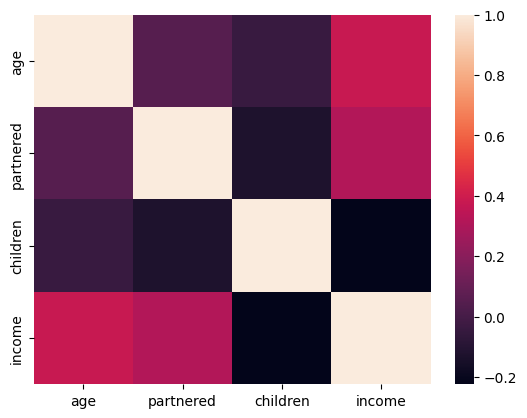

In [7]:
sns.heatmap(df.corr())

Text(0, 0.5, 'income')

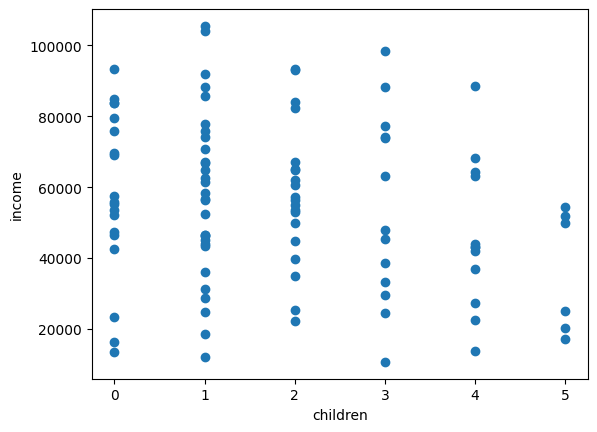

In [8]:
plt.scatter(df.children,df["income"])
plt.xlabel("children")
plt.ylabel("income")

Text(0, 0.5, 'income')

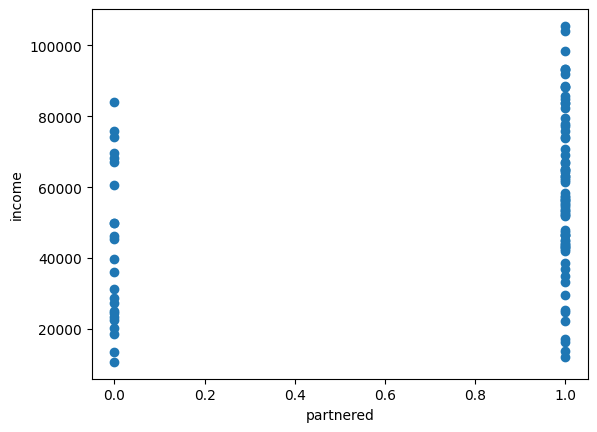

In [9]:
plt.scatter(df.partnered,df["income"])
plt.xlabel("partnered")
plt.ylabel("income")

Text(0, 0.5, 'income')

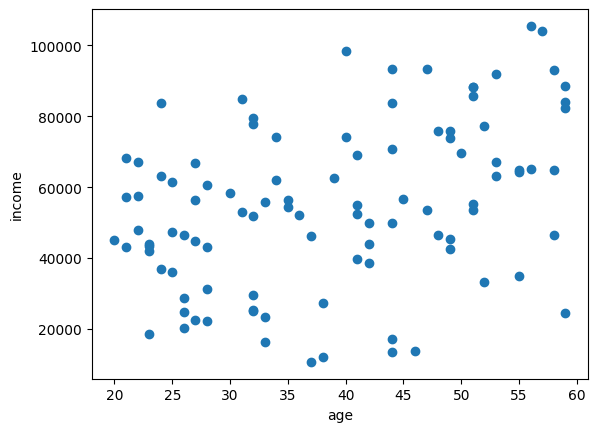

In [10]:
plt.scatter(df.age,df["income"])
plt.xlabel("age")
plt.ylabel("income")

In [11]:
df.drop('partnered', inplace=True, axis=1)

In [12]:
df.head()

,age,children,income
0,35.0,1,56531.361287
1,58.0,2,93026.182530
2,49.0,0,42693.010819
3,44.0,0,83680.128218
4,26.0,1,28845.520835


In [13]:
kn=KMeans(n_clusters=2)
y_pred=kn.fit_predict(df[["age","income"]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [14]:
df["cluster"]=y_pred
df.head()

,age,children,income,cluster
0,35.0,1,56531.361287,1
1,58.0,2,93026.182530,0
2,49.0,0,42693.010819,1
3,44.0,0,83680.128218,0
4,26.0,1,28845.520835,1


In [15]:
kn.cluster_centers_

array([[4.36904762e+01, 7.68267243e+04],
       [3.52758621e+01, 3.90871697e+04]])

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]



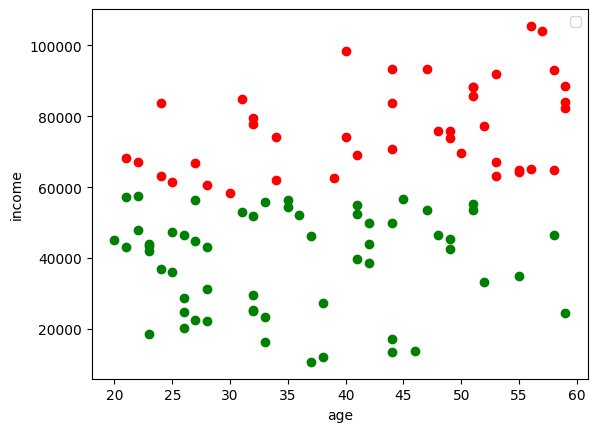

In [17]:
 plt.scatter(df1.age,df1["income"],color="red")
 plt.scatter(df2.age,df2["income"],color="green")
 plt.xlabel("age")
 plt.ylabel("income")
 plt.legend()

In [18]:
scaler=MinMaxScaler()
scaler.fit(df[["income"]])
df["income"]=scaler.transform(df[["income"]])
scaler.fit(df[["age"]])
df["age"]=scaler.transform(df[["age"]])
df.head()

,age,children,income,cluster
0,0.384615,1,0.483385,1
1,0.974359,2,0.868204,0
2,0.743590,0,0.337467,1
3,0.615385,0,0.769654,0
4,0.153846,1,0.191452,1


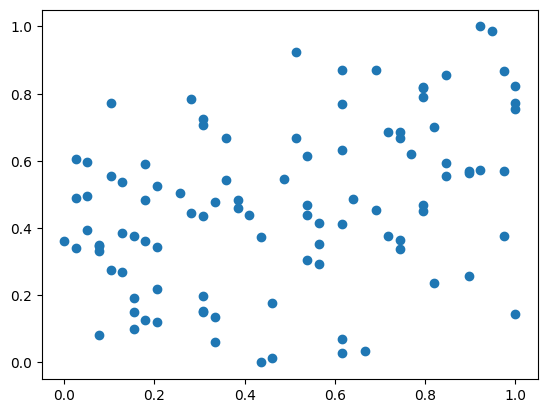

In [19]:
plt.scatter(df.age,df["income"])

In [20]:
kn=KMeans(n_clusters=2)
y_pred=kn.fit_predict(df[["age","income"]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

In [21]:
df["cluster"]=y_pred
df.head()

,age,children,income,cluster
0,0.384615,1,0.483385,0
1,0.974359,2,0.868204,1
2,0.743590,0,0.337467,1
3,0.615385,0,0.769654,1
4,0.153846,1,0.191452,0


In [22]:
kn.cluster_centers_

array([[0.27393162, 0.3609133 ],
       [0.79487179, 0.62508334]])

#Elbow plot for multivarietes

In [25]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  kn=KMeans(n_clusters=k)
  kn.fit(df[["age","income"]])
  sse.append(kn.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
sse

[15.055597240032313,
 6.867649971178537,
 4.727786195411296,
 3.45118952384562,
 2.7491284593177987,
 2.3275698958197335,
 1.9965339319799238,
 1.6373876310712228,
 1.4128010111374565]

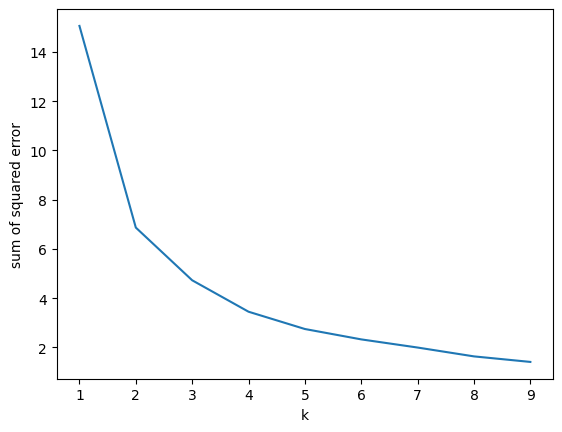

In [27]:
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)